# Lab7 (Students version): PageRank
## Students:
## Jack Thay - 21201079
## Thierry Ung - 3804472
We can use the following libraries.

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sys
import random
import time
import copy
import time
print(sys.version)

3.7.11 (default, Jul 27 2021, 09:42:29) [MSC v.1916 64 bit (AMD64)]


## Exercise 1: preliminary questions

In this lab work, we use the graph Wiki that you will find on Moodle. It is a subpart of the English language Wikipedia. A link represent a hyperlink from a page to another.

**Warning:** it is a directed graph, so in this case a line

12 126

means that there is a directed link from node 12 to node 126, but not necessarily in the other direction!

For your information, we indicate that this network has:

- 50988 nodes

- 1778125 directed links

### Question 1: preliminaries

Load the graph in memory, in the adjacency list format, **for both the list of predecessors and the list of successors**. 

Check its number of nodes and of directed links. 

In [64]:
# Code taken from our TP1

def load_directed_graph(filename):
    # Initialize empty dictionaries for the forward and reverse adjacency lists.
    adjacency_list = {}
    reverse_adjacency_list = {}

    # Open the specified file for reading.
    with open(filename, 'r') as file:
        # Loop through each line in the file.
        for line in file:
            # Check if the line is not empty.
            if line.strip():
                # Split the line into two nodes representing an edge.
                edge_info = line.strip().split()
                node1, node2 = edge_info[0], edge_info[1]
                # Check if node1 is not already in the forward adjacency list.
                if node1 not in adjacency_list:
                    # Initialize an empty list for node1 in both forward and reverse lists.
                    adjacency_list[node1] = []
                    reverse_adjacency_list[node1] = []
                # Check if node2 is not already in the forward adjacency list.
                if node2 not in adjacency_list:
                    # Initialize an empty list for node2 in both forward and reverse lists.
                    adjacency_list[node2] = []
                    reverse_adjacency_list[node2] = []
                # Add node2 to the adjacency list of node1 (forward edge).
                adjacency_list[node1].append(node2)
                # Add node1 to the reverse adjacency list of node2 (reverse edge).
                reverse_adjacency_list[node2].append(node1)

    # Return the two adjacency lists.
    return adjacency_list, reverse_adjacency_list

In [65]:
def count_node(graph):
    return len(graph)

In [66]:
def count_link(graph):
    count = 0
    for node in graph:
        count += len(graph[node])
    return count

In [67]:
filename = "wiki_2009.txt"
adjacency_list, reverse_adjacency_list = load_directed_graph(filename)

In [68]:
count_node(adjacency_list)

50988

In [69]:
count_node(reverse_adjacency_list)

50988

In [70]:
count_link(adjacency_list)

1778125

In [71]:
count_link(reverse_adjacency_list)

1778125

We remind you that the transition matrix $T$ is defined like this: if there is a link $ u \rightarrow v$ then $T[v][u] = \frac{1}{d_{out}(u)}$ where $d_{out}(u)$ is the out-degree of $u$ and otherwise  $T[v][u] = 0$.

Note that it is not possible to store $T$ in memory as a $ n \times n $ matrix, it would take too much memory. So instead of explicitly computing a matrix $T$, we use the adjacency lists of the graph (lists of predecessors, lists of successors) in this way: 

- from the list of successors, we store the outdegree ($ d_{out}$) of the nodes in a dedicated dictionary,

- we use that a node $v$ receive PageRank from node $u$ if and only if $u$ is a predecessor of $v$.

### Question 2: out-degree and dead-ends

Create a dictionary that contains the out-degree of each node. Note that to avoid problems later, you should give the out-degree of all the nodes if the network, even if it is $0$. Report the fraction of nodes which are dead-ends.

In [72]:
# Code taken from our TP1

def compute_degree_distribution_directed(adjacency_list, reverse_adjacency_list):
    # Initialize two empty dictionaries to store degree distributions.
    in_degree_distribution = {}   # For in-degrees
    out_degree_distribution = {}  # For out-degrees

    # Compute out-degree distribution.
    for node, out_neighbors in adjacency_list.items():
        # Calculate the out-degree of the current node by finding the number of outgoing edges.
        out_degree = len(out_neighbors)
        # Check if the out-degree already exists as a key in the out_degree_distribution dictionary.
        if out_degree in out_degree_distribution:
            # If it exists, increment the count for that out-degree by 1.
            out_degree_distribution[out_degree] += 1
        else:
            # If it doesn't exist, add it to the out_degree_distribution dictionary with a count of 1.
            out_degree_distribution[out_degree] = 1

    # Compute in-degree distribution.
    for node, in_neighbors in reverse_adjacency_list.items():
        # Calculate the in-degree of the current node by finding the number of incoming edges.
        in_degree = len(in_neighbors)
        # Check if the in-degree already exists as a key in the in_degree_distribution dictionary.
        if in_degree in in_degree_distribution:
            # If it exists, increment the count for that in-degree by 1.
            in_degree_distribution[in_degree] += 1
        else:
            # If it doesn't exist, add it to the in_degree_distribution dictionary with a count of 1.
            in_degree_distribution[in_degree] = 1

    # Return both in-degree and out-degree distributions as dictionaries.
    return in_degree_distribution, out_degree_distribution

In [73]:
in_degree_dist, out_degree_dist = compute_degree_distribution_directed(adjacency_list, reverse_adjacency_list)
print("\nOut-Degree Distribution:")
print(out_degree_dist)


Out-Degree Distribution:
{126: 35, 136: 15, 25: 750, 113: 40, 281: 10, 274: 6, 19: 1175, 41: 378, 140: 27, 38: 437, 39: 408, 12: 1100, 293: 5, 64: 214, 87: 109, 16: 1246, 256: 10, 17: 1342, 15: 1149, 66: 168, 58: 217, 135: 29, 246: 5, 129: 26, 31: 593, 128: 28, 32: 558, 98: 68, 97: 73, 101: 63, 75: 128, 40: 385, 34: 463, 46: 299, 43: 367, 291: 7, 71: 145, 273: 6, 24: 769, 37: 432, 33: 506, 44: 329, 121: 30, 26: 726, 48: 312, 305: 7, 266: 11, 132: 19, 86: 81, 51: 243, 63: 191, 82: 88, 253: 9, 175: 6, 168: 13, 105: 51, 1: 1046, 319: 6, 103: 68, 65: 181, 141: 24, 144: 15, 62: 174, 454: 3, 68: 162, 508: 2, 295: 4, 611: 1, 299: 5, 211: 5, 693: 1, 23: 826, 76: 116, 20: 1144, 67: 173, 133: 23, 57: 236, 27: 663, 28: 643, 47: 300, 61: 222, 30: 610, 18: 1296, 21: 992, 3: 1452, 29: 666, 84: 105, 92: 75, 79: 113, 153: 20, 60: 196, 173: 10, 54: 224, 142: 25, 294: 5, 50: 285, 52: 259, 42: 388, 35: 466, 11: 1226, 85: 104, 130: 39, 112: 49, 77: 116, 787: 1, 56: 236, 131: 30, 55: 242, 59: 205, 148: 17

### Question 3: PageRank without evaporation

Using the previous questions, implement a basic power iteration (for the moment, it is not a complete PageRank algorithm). 

The principle is to iterate $t$ times the matrix product:

$$ X \leftarrow T.X $$

$X$ is a vector initialized to $ [\frac{1}{n} \ldots \frac{1}{n}]$ and $T$ is the transition matrix. We strongly advise you to store $X$ as a dictionary of float.

Run the power iteration for $ t=10 $ steps and measure at each step the value of $ ||X||_1 = \sum _i |X[i]| $.
What do you observe? Can you explain in one sentence?

In [74]:
def initialize_vector(nodes):
    n = len(nodes)
    # Initialize the vector X with equal probabilities for all nodes.
    initial_value = 1 / n
    vector = {node: initial_value for node in nodes}
    return vector

In [75]:
def power_iteration(adjacency_list, iterations=10):
    # Get the list of nodes from the adjacency list.
    nodes = list(adjacency_list.keys())

    # Initialize the vector X.
    vector_X = initialize_vector(nodes)

    # Perform power iteration for the specified number of iterations.
    for iteration in range(iterations):
        # Initialize a new vector to store the result of matrix multiplication T.X.
        new_vector_X = {node: 0.0 for node in nodes}

        # Iterate over each node in the graph.
        for node in nodes:
            # Get the out-neighbors of the current node.
            out_neighbors = adjacency_list[node]
            # Calculate the contribution of each out-neighbor to the new vector.
            for out_neighbor in out_neighbors:
                new_vector_X[out_neighbor] += vector_X[node] / len(out_neighbors)

        # Update the vector X with the result of matrix multiplication.
        vector_X = new_vector_X

        # Calculate and print the value of ||X||_1 at each step.
        norm_value = sum(abs(value) for value in vector_X.values())
        print(f"Iteration {iteration + 1}, ||X||₁: {norm_value}") # For the life of me, I can't find how to include mathtext in print()
        
    return vector_X

In [76]:
result_vector = power_iteration(reverse_adjacency_list, iterations=10)

Iteration 1, ||X||₁: 0.9301012002824216
Iteration 2, ||X||₁: 0.9066278034845172
Iteration 3, ||X||₁: 0.8875062377485583
Iteration 4, ||X||₁: 0.8690075823280715
Iteration 5, ||X||₁: 0.8514798313995232
Iteration 6, ||X||₁: 0.8344955071065522
Iteration 7, ||X||₁: 0.8179921071525006
Iteration 8, ||X||₁: 0.8019150574539268
Iteration 9, ||X||₁: 0.7862304737550262
Iteration 10, ||X||₁: 0.7709262226859702


### Answer:  
The L1 norm $ ||X||_1 $ of the vector X consistently decreases over the iterations, indicating a potential concentration of probability mass on fewer nodes or a more even distribution across the nodes.

## Exercise 2: Pagerank with evaporation

### Question 4: implementing a complete PageRank

Now, we improve the basic power iteration process to make a real Pagerank program, by adding a normalization and an evaporation (or teleportation) process. So now each iteration is described by:

$$ X \leftarrow (1-s).T.X + s.I $$

where $I$ is the vector $ [\frac{1}{n} \ldots \frac{1}{n}]$.

* Implement the Pagerank algorithm (as in the course). Don't forget to normalize $X$ after each step, that is to say do: $ X[i] \leftarrow \frac{X[i]}{||X||_1}$.

* Run the Pagerank for $t=10$ steps, $s=0.2$.

* Observe the nodes which have the top-5 pagerank values, then go and have a look to the Wiki index also provided on Moodle, to see to what Wikipedia pages they correspond. 

* Comment your results: are you surprised by the top-ranked pages?

In [77]:
def complete_pagerank(adjacency_list, iterations=10, damping_factor=0.2):
    nodes = list(adjacency_list.keys())
    n = len(nodes)

    # Initialize the vector X with equal probabilities for all nodes.
    initial_value = 1 / n
    vector_X = {node: initial_value for node in nodes}

    for iteration in range(iterations):
        # Initialize a new vector to store the result of matrix multiplication (1-s)T.X + sI.
        new_vector_X = {node: 0.0 for node in nodes}

        # Teleportation: Add the teleportation factor s * I to the new vector.
        for node in nodes:
            new_vector_X[node] += damping_factor / n

        # Matrix multiplication: (1-s)T.X
        for node in nodes:
            out_neighbors = adjacency_list[node]
            for out_neighbor in out_neighbors:
                new_vector_X[out_neighbor] += (1 - damping_factor) * vector_X[node] / len(out_neighbors)

        # Update the vector X with the result of matrix multiplication.
        vector_X = new_vector_X

        # Normalize the vector X.
        norm_value = sum(abs(value) for value in vector_X.values())
        vector_X = {node: value / norm_value for node, value in vector_X.items()}

        # Print the value of ||X||_1 at each step.
        print(f"Iteration {iteration + 1}, ||X||₁: {norm_value}")

    return vector_X

In [78]:
complete_result_vector = complete_pagerank(reverse_adjacency_list, iterations=10, damping_factor=0.2)

Iteration 1, ||X||₁: 0.9440809602259399
Iteration 2, ||X||₁: 0.9722409591872306
Iteration 3, ||X||₁: 0.9745572354561276
Iteration 4, ||X||₁: 0.9746937088742322
Iteration 5, ||X||₁: 0.9749170167877192
Iteration 6, ||X||₁: 0.9749797150321512
Iteration 7, ||X||₁: 0.9750171321668212
Iteration 8, ||X||₁: 0.9750387227713989
Iteration 9, ||X||₁: 0.9750522570710635
Iteration 10, ||X||₁: 0.9750628611482673


In [98]:
def load_wiki_index(filename):
    wiki_index = {}

    with open(filename, 'r', encoding='utf-8') as file: # Encoding utf-8, otherwise we'll get an error "can't decode byte 0x81" in the next cells
        for line in file:
            # Skip lines that don't contain valid page information or start with '#'
            if not line.strip() or line.startswith('#'):
                continue
            # Split the line into page ID and page title (handle the case of missing title)
            parts = line.strip().split('\t', 1)
            if len(parts) == 2:
                page_id, page_title = parts
            else:
                # Skip lines with missing page ID or invalid format
                continue
            # Convert page ID to integer
            try:
                page_id = int(page_id)
            except ValueError:
                # Skip lines with non-integer page ID
                continue
            # Add entry to the dictionary
            wiki_index[page_id] = page_title

    return wiki_index

In [99]:
# Assuming result_vector is the output of your pagerank function
sorted_nodes = sorted(complete_result_vector.items(), key=lambda x: x[1], reverse=True)

# Print the top-5 nodes with their PageRank scores
top_5_nodes = [node for node, _ in sorted_nodes[:5]]
print("Top-5 Pages:")
for node in top_5_nodes:
    print(f"{node}: {complete_result_vector[node]}")

Top-5 Pages:
13922: 0.0019260774753130478
9025: 0.0007915630668477488
71880: 0.0007533827532171538
69624: 0.0007481736473882532
21769: 0.0007478381582533073


In [100]:
# Load the Wiki index
wiki_index_filename = "index_wiki_2009.txt"
wiki_index = load_wiki_index(wiki_index_filename)

In [101]:
# Convert string keys to integers in title_to_id_mapping
title_to_id_mapping = {title: node for node, title in wiki_index.items()}
title_to_id_mapping = {int(title) if str(title).isdigit() else int(wiki_index[title]): title for title in title_to_id_mapping.values()}

# Convert the IDs in top_5_nodes to integers
top_5_nodes = [int(node) for node in top_5_nodes]

In [102]:
print("Corresponding Wikipedia Pages:")
for node in top_5_nodes:
    # Convert the PageRank ID to the corresponding page title
    if node in title_to_id_mapping:
        corresponding_title = wiki_index[title_to_id_mapping[node]]
        print(f"{node}: {corresponding_title}")
    else:
        print(f"{node}: No corresponding Wikipedia page found.")

Corresponding Wikipedia Pages:
13922: History of present-day nations and states
9025: List of deities
71880: Federal Information Processing Standard state code
69624: List of Biblical names
21769: National Film Registry


### Answer : 
Some of the results of the top-ranked pages from the PageRank analysis are strange:


- "Federal Information Processing Standard state code" stands out as it is really technical, being in the top 5 ranked page make it look like something went wrong, unless americans search for this on a regular basis without our knowledge. Maybe it's related to 2008's crisis?
- "National Film Registry" may make sense if it's the american film registry, however we're having doubts it was read that often back then.

The other 3 seems to make sense:

- "List of Biblical names" is relevant since it take into account jewish, christian names and the wide influence of the Bible in our culture.  
- "History of present-day nations and states" makes sense as a broadly important topic.  
- "List of deities" is also understandable as a widely referenced topic. 

### Question 5: correlation with other centrality scores
For the first thousand nodes ranked, plot their PageRank as a function of their in-degree. What do you observe? 

Iteration 1, ||X||₁: 0.9955126696478366
Iteration 2, ||X||₁: 0.9985926321455747
Iteration 3, ||X||₁: 0.9986397363772683
Iteration 4, ||X||₁: 0.9986678190887778
Iteration 5, ||X||₁: 0.9986701955730631
Iteration 6, ||X||₁: 0.9986719952672022
Iteration 7, ||X||₁: 0.9986723158562105
Iteration 8, ||X||₁: 0.9986725323179922
Iteration 9, ||X||₁: 0.9986725919239268
Iteration 10, ||X||₁: 0.9986726398548246


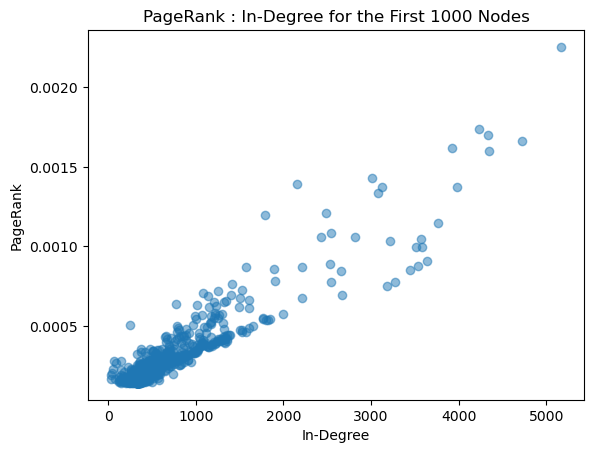

In [83]:
# Get the PageRank for the first thousand nodes
result_vector = complete_pagerank(adjacency_list, iterations=10, damping_factor=0.2)
sorted_nodes = sorted(result_vector.items(), key=lambda x: x[1], reverse=True)
top_1000_nodes = [node for node, _ in sorted_nodes[:1000]]

# Extract in-degrees for the top 1000 nodes
in_degrees = {node: len(reverse_adjacency_list[node]) for node in top_1000_nodes}

# Extract PageRanks for the top 1000 nodes
pageranks_top = [result_vector[node] for node in top_1000_nodes]

# Plot the data
plt.scatter(in_degrees.values(), pageranks_top, alpha=0.5)
plt.title('PageRank : In-Degree for the First 1000 Nodes')
plt.xlabel('In-Degree')
plt.ylabel('PageRank')
plt.show()

### Answer :

There is a strong positive correlation between PageRank and in-degree for the first 1000 nodes. This means the nodes with the highest in-degree (the one with the most incoming links) tend to have the highest PageRank.

Probably because PageRank is calculated based on the quantity of incoming links. A node with a high in-degree is more likely to be important because it is linked to by many other nodes, which will most likely include other important nodes.

However, there are also some nodes with a high in-degree but a relatively low PageRank. This can happen if the incoming links are from low-quality nodes (presumably, pages with a low quantity of information). For example, a node may have a lot of incoming links from spam websites.

## Exercise 3: Convergence of the PageRank

### Question 6: measuring the convergence speed

Instead of setting the number of steps, we want to give another stopping criterion: the process is stopped when the norm of the difference of the PageRank varies by less than $\epsilon$ between two steps. In other words, the algorithm stops when

$$    \sum _i |X_t[i] - X_{t-1}[i]|  < \epsilon $$

Modify the algorithm to adapt to this criterion and then measure the number of iterations needed with an $ \epsilon = 10^{-5}$ (with $ \alpha = 0.2 $, as before).

Plot $  \sum _i |X_t[i] - X_{t-1}[i]| $ as a function of $t$, use a logscale for the $y$ axis, what do you observe? (we don't ask you to explain this observation).

What you should observe here is one of the key of the PageRank success: its very fast convergence on real-world networks.

In [84]:
def pagerank_convergence(adjacency_list, epsilon=1e-5, damping_factor=0.2):
    nodes = list(adjacency_list.keys())
    n = len(nodes)

    # Initialize the vector X with equal probabilities for all nodes.
    initial_value = 1 / n
    vector_X = {node: initial_value for node in nodes}

    norm_differences = []  # List to store norm differences at each iteration.
    iteration = 0

    while True:
        # Initialize a new vector to store the result of matrix multiplication (1-s)T.X + sI.
        new_vector_X = {node: 0.0 for node in nodes}

        # Teleportation: Add the teleportation factor s * I to the new vector.
        for node in nodes:
            new_vector_X[node] += damping_factor / n

        # Matrix multiplication: (1-s)T.X
        for node in nodes:
            out_neighbors = adjacency_list[node]
            for out_neighbor in out_neighbors:
                new_vector_X[out_neighbor] += (1 - damping_factor) * vector_X[node] / len(out_neighbors)

        # Update the vector X with the result of matrix multiplication.
        new_norm_value = sum(abs(value) for value in new_vector_X.values())
        new_vector_X = {node: value / new_norm_value for node, value in new_vector_X.items()}

        # Calculate the norm of the difference between the new and old vectors.
        norm_difference = sum(abs(new_vector_X[node] - vector_X[node]) for node in nodes)
        norm_differences.append(norm_difference)

        # Update the vector X and iteration count.
        vector_X = new_vector_X
        iteration += 1

        # Print the value of ||X||_1 at each step.
        print(f"Iteration {iteration}, ||X||₁: {new_norm_value}")

        # Check the stopping criterion.
        if norm_difference < epsilon:
            break

    return vector_X, norm_differences

In [85]:
pagerank_vector, norm_differences = pagerank_convergence(adjacency_list)

Iteration 1, ||X||₁: 0.9955126696478366
Iteration 2, ||X||₁: 0.9985926321455747
Iteration 3, ||X||₁: 0.9986397363772683
Iteration 4, ||X||₁: 0.9986678190887778
Iteration 5, ||X||₁: 0.9986701955730631
Iteration 6, ||X||₁: 0.9986719952672022
Iteration 7, ||X||₁: 0.9986723158562105
Iteration 8, ||X||₁: 0.9986725323179922
Iteration 9, ||X||₁: 0.9986725919239268
Iteration 10, ||X||₁: 0.9986726398548246
Iteration 11, ||X||₁: 0.9986726644005054
Iteration 12, ||X||₁: 0.9986726819718003
Iteration 13, ||X||₁: 0.9986726925454018
Iteration 14, ||X||₁: 0.998672699404428
Iteration 15, ||X||₁: 0.9986727035267076
Iteration 16, ||X||₁: 0.9986727060323531
Iteration 17, ||X||₁: 0.998672707486922
Iteration 18, ||X||₁: 0.9986727083269636


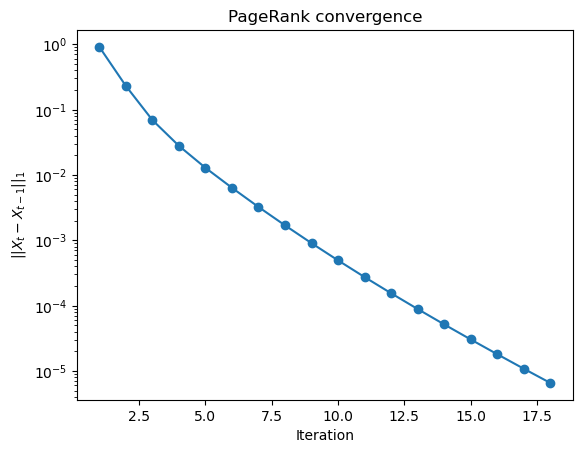

In [86]:
iterations = range(1, len(norm_differences) + 1)
plt.plot(iterations, norm_differences, marker='o')
plt.yscale('log')  # Use log scale for the y-axis
plt.xlabel('Iteration')
plt.ylabel(r'$||X_t - X_{t-1}||_1$') # OK, this time, mathtext WORKS!
plt.title('PageRank convergence')
plt.show()

### Answer : 
The graph shows that pagerank convergence increases as the number of iterations increases.     
This suggests the algorithm is able to be more accurate the more iterations are made.

### Question 7: investigating the convergence with parameter $ \alpha $

Now, implement the algorithm with different $ \alpha $ values, for instance $0.01$, $0.02$, $0.1$, $0.2$, $0.5$ and measure the number of iterations needed with an $ \epsilon = 10^{-5}$. What is the effect of $ \alpha $ on the convergence speed?

Iteration 1, ||X||₁: 0.9944469286891662
Iteration 2, ||X||₁: 0.9991686573302807
Iteration 3, ||X||₁: 0.9992536677786944
Iteration 4, ||X||₁: 0.9993193587634746
Iteration 5, ||X||₁: 0.9993261236308432
Iteration 6, ||X||₁: 0.9993325609898603
Iteration 7, ||X||₁: 0.999333968900306
Iteration 8, ||X||₁: 0.999335152638191
Iteration 9, ||X||₁: 0.9993355542739993
Iteration 10, ||X||₁: 0.9993359553538538
Iteration 11, ||X||₁: 0.99933620909557
Iteration 12, ||X||₁: 0.9993364339510907
Iteration 13, ||X||₁: 0.9993366012137642
Iteration 14, ||X||₁: 0.9993367354224396
Iteration 15, ||X||₁: 0.9993368351511737
Iteration 16, ||X||₁: 0.9993369101167703
Iteration 17, ||X||₁: 0.9993369639269811
Iteration 18, ||X||₁: 0.9993370023564881
Iteration 19, ||X||₁: 0.9993370287315811
Iteration 20, ||X||₁: 0.9993370465786988
Iteration 21, ||X||₁: 0.9993370580782024
Iteration 22, ||X||₁: 0.99933706524706
Iteration 23, ||X||₁: 0.9993370693279733
Iteration 24, ||X||₁: 0.9993370713984041
Iteration 25, ||X||₁: 0.9993370

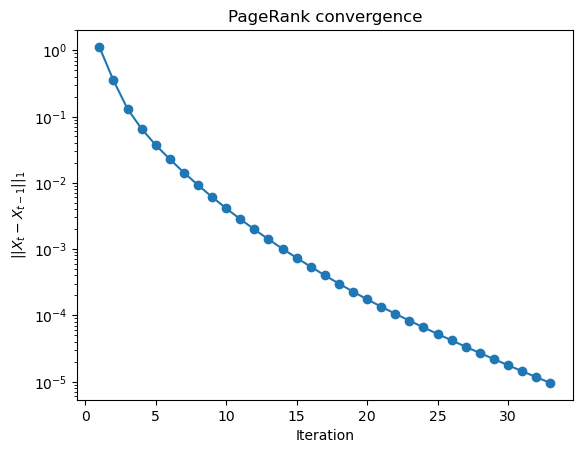

In [92]:
epsilon=1e-5
damping_factor=0.01
pagerank_vector, norm_differences = pagerank_convergence(adjacency_list, epsilon, damping_factor)

iterations = range(1, len(norm_differences) + 1)
plt.plot(iterations, norm_differences, marker='o')
plt.yscale('log')  # Use log scale for the y-axis
plt.xlabel('Iteration')
plt.ylabel(r'$||X_t - X_{t-1}||_1$')
plt.title('PageRank convergence')
plt.show()

Iteration 1, ||X||₁: 0.9945030203186579
Iteration 2, ||X||₁: 0.9991295813017042
Iteration 3, ||X||₁: 0.9992122600132621
Iteration 4, ||X||₁: 0.9992753462338254
Iteration 5, ||X||₁: 0.9992817830837173
Iteration 6, ||X||₁: 0.9992878415461831
Iteration 7, ||X||₁: 0.9992891537712508
Iteration 8, ||X||₁: 0.9992902455625463
Iteration 9, ||X||₁: 0.9992906123480506
Iteration 10, ||X||₁: 0.9992909748612943
Iteration 11, ||X||₁: 0.9992912019103337
Iteration 12, ||X||₁: 0.9992914010780507
Iteration 13, ||X||₁: 0.9992915477457966
Iteration 14, ||X||₁: 0.9992916642447432
Iteration 15, ||X||₁: 0.9992917499440948
Iteration 16, ||X||₁: 0.9992918137159907
Iteration 17, ||X||₁: 0.999291859031478
Iteration 18, ||X||₁: 0.9992918910689027
Iteration 19, ||X||₁: 0.9992919128360764
Iteration 20, ||X||₁: 0.999291927417119
Iteration 21, ||X||₁: 0.9992919367178165
Iteration 22, ||X||₁: 0.9992919424576493
Iteration 23, ||X||₁: 0.9992919456923779
Iteration 24, ||X||₁: 0.9992919473169829
Iteration 25, ||X||₁: 0.999

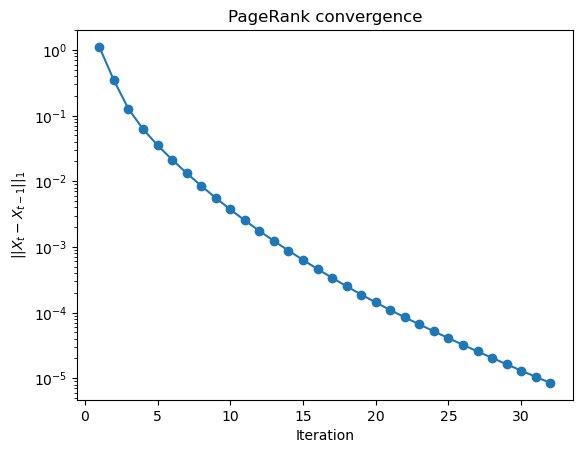

In [88]:
epsilon=1e-5
damping_factor=0.02
pagerank_vector, norm_differences = pagerank_convergence(adjacency_list, epsilon, damping_factor)

iterations = range(1, len(norm_differences) + 1)
plt.plot(iterations, norm_differences, marker='o')
plt.yscale('log')  # Use log scale for the y-axis
plt.xlabel('Iteration')
plt.ylabel(r'$||X_t - X_{t-1}||_1$')
plt.title('PageRank convergence')
plt.show()

Iteration 1, ||X||₁: 0.9949517533537734
Iteration 2, ||X||₁: 0.9988520284791765
Iteration 3, ||X||₁: 0.9989174173839989
Iteration 4, ||X||₁: 0.9989623431671137
Iteration 5, ||X||₁: 0.9989665831369072
Iteration 6, ||X||₁: 0.9989702245454898
Iteration 7, ||X||₁: 0.9989709513270463
Iteration 8, ||X||₁: 0.9989715052154304
Iteration 9, ||X||₁: 0.9989716764238072
Iteration 10, ||X||₁: 0.9989718315986654
Iteration 11, ||X||₁: 0.9989719209220017
Iteration 12, ||X||₁: 0.9989719928733933
Iteration 13, ||X||₁: 0.998972041557343
Iteration 14, ||X||₁: 0.9989720770790291
Iteration 15, ||X||₁: 0.9989721010863275
Iteration 16, ||X||₁: 0.9989721174979159
Iteration 17, ||X||₁: 0.9989721282118839
Iteration 18, ||X||₁: 0.9989721351705902
Iteration 19, ||X||₁: 0.9989721395142385
Iteration 20, ||X||₁: 0.9989721421873171
Iteration 21, ||X||₁: 0.9989721437538648
Iteration 22, ||X||₁: 0.9989721446420466
Iteration 23, ||X||₁: 0.9989721451019888


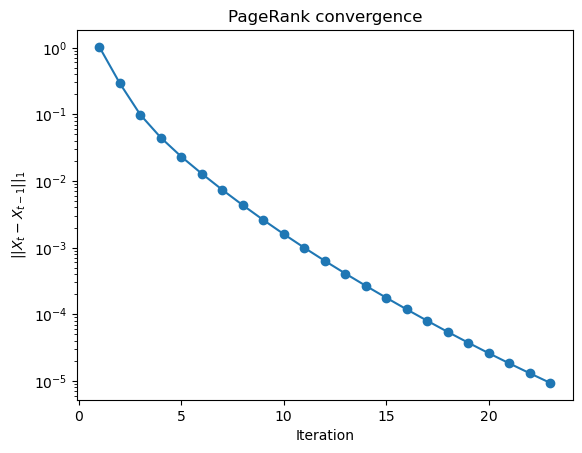

In [89]:
epsilon=1e-5
damping_factor=0.1
pagerank_vector, norm_differences = pagerank_convergence(adjacency_list, epsilon, damping_factor)

iterations = range(1, len(norm_differences) + 1)
plt.plot(iterations, norm_differences, marker='o')
plt.yscale('log')  # Use log scale for the y-axis
plt.xlabel('Iteration')
plt.ylabel(r'$||X_t - X_{t-1}||_1$')
plt.title('PageRank convergence')
plt.show()

Iteration 1, ||X||₁: 0.9955126696478366
Iteration 2, ||X||₁: 0.9985926321455747
Iteration 3, ||X||₁: 0.9986397363772683
Iteration 4, ||X||₁: 0.9986678190887778
Iteration 5, ||X||₁: 0.9986701955730631
Iteration 6, ||X||₁: 0.9986719952672022
Iteration 7, ||X||₁: 0.9986723158562105
Iteration 8, ||X||₁: 0.9986725323179922
Iteration 9, ||X||₁: 0.9986725919239268
Iteration 10, ||X||₁: 0.9986726398548246
Iteration 11, ||X||₁: 0.9986726644005054
Iteration 12, ||X||₁: 0.9986726819718003
Iteration 13, ||X||₁: 0.9986726925454018
Iteration 14, ||X||₁: 0.998672699404428
Iteration 15, ||X||₁: 0.9986727035267076
Iteration 16, ||X||₁: 0.9986727060323531
Iteration 17, ||X||₁: 0.998672707486922
Iteration 18, ||X||₁: 0.9986727083269636


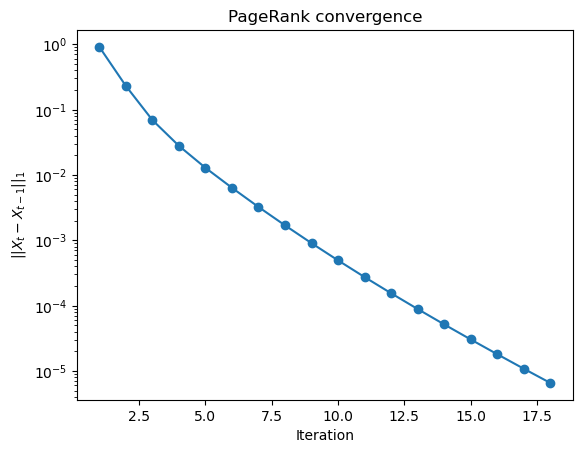

In [90]:
epsilon=1e-5
damping_factor=0.2
pagerank_vector, norm_differences = pagerank_convergence(adjacency_list, epsilon, damping_factor)

iterations = range(1, len(norm_differences) + 1)
plt.plot(iterations, norm_differences, marker='o')
plt.yscale('log')  # Use log scale for the y-axis
plt.xlabel('Iteration')
plt.ylabel(r'$||X_t - X_{t-1}||_1$')
plt.title('PageRank convergence')
plt.show()

Iteration 1, ||X||₁: 0.9971954185296231
Iteration 2, ||X||₁: 0.9983964986539451
Iteration 3, ||X||₁: 0.9984088524137439
Iteration 4, ||X||₁: 0.9984131495628071
Iteration 5, ||X||₁: 0.9984133824814757
Iteration 6, ||X||₁: 0.9984134901087363
Iteration 7, ||X||₁: 0.9984135022259851
Iteration 8, ||X||₁: 0.9984135072874278
Iteration 9, ||X||₁: 0.9984135081635405
Iteration 10, ||X||₁: 0.9984135086012035


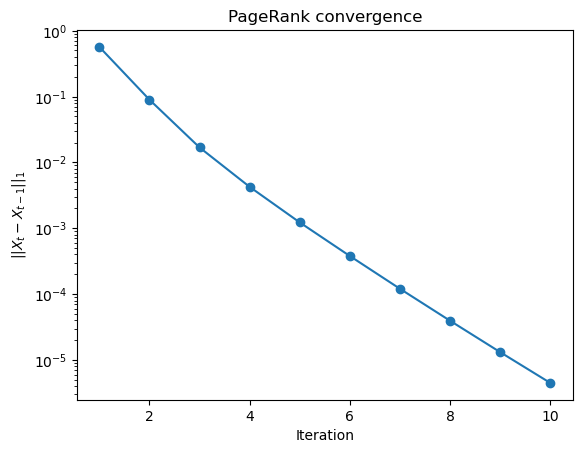

In [91]:
epsilon=1e-5
damping_factor=0.5
pagerank_vector, norm_differences = pagerank_convergence(adjacency_list, epsilon, damping_factor)

iterations = range(1, len(norm_differences) + 1)
plt.plot(iterations, norm_differences, marker='o')
plt.yscale('log')  # Use log scale for the y-axis
plt.xlabel('Iteration')
plt.ylabel(r'$||X_t - X_{t-1}||_1$')
plt.title('PageRank convergence')
plt.show()

### Answer :

A larger 𝛼 generally means a faster convergence, and a smaller 𝛼 may result in slower convergence due to the increased influence of random teleportation. 